In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
!wget https://edx.prometheus.org.ua/assets/courseware/v1/fd138d1e88ee0d3f3555ce844ea987fe/c4x/IRF/Stat101/asset/moon.csv

--2020-04-04 12:24:03--  https://edx.prometheus.org.ua/assets/courseware/v1/fd138d1e88ee0d3f3555ce844ea987fe/c4x/IRF/Stat101/asset/moon.csv
Resolving edx.prometheus.org.ua (edx.prometheus.org.ua)... 80.79.16.75
Connecting to edx.prometheus.org.ua (edx.prometheus.org.ua)|80.79.16.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53007 (52K) [application/vnd.ms-excel]
Saving to: ‘moon.csv’

moon.csv            100%[===================>]  51.76K  --.-KB/s    in 0.1s    

2020-04-04 12:24:04 (456 KB/s) - ‘moon.csv’ saved [53007/53007]



In [8]:
!wget https://www.dropbox.com/s/uxzus7y06vw4e0g/crimes.csv

--2020-04-04 12:26:03--  https://www.dropbox.com/s/uxzus7y06vw4e0g/crimes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uxzus7y06vw4e0g/crimes.csv [following]
--2020-04-04 12:26:03--  https://www.dropbox.com/s/raw/uxzus7y06vw4e0g/crimes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc89c5021d04d57b85f93165975.dl.dropboxusercontent.com/cd/0/inline/A1OBWCVSI2-IWr4PoPTTmvaMDsTcEkpqlhFkF1Kw0DKhbtEnEKriEsQxDuHTdw0TsgG8gMTvJo14atYMZdPIYuBXHTJBiUYakTvS8OZH5b1qKA/file# [following]
--2020-04-04 12:26:03--  https://ucc89c5021d04d57b85f93165975.dl.dropboxusercontent.com/cd/0/inline/A1OBWCVSI2-IWr4PoPTTmvaMDsTcEkpqlhFkF1Kw0DKhbtEnEKriEsQxDuHTdw0TsgG8gMTvJo14atYMZdPIYuBXHTJBiUYakTvS8OZH5b1qKA/file
Resolving ucc89c5021d04d5

In [0]:
%%R 
library(lubridate)
library(dplyr)
library(ggplot2)

In [9]:
%%R 
crime <- read.csv("crimes.csv", header = TRUE)
str(crime)

'data.frame':	878049 obs. of  9 variables:
 $ Dates     : Factor w/ 389257 levels "2003-01-06 00:01:00",..: 389257 389257 389256 389255 389255 389255 389255 389255 389254 389254 ...
 $ Category  : Factor w/ 39 levels "ARSON","ASSAULT",..: 38 22 22 17 17 17 37 37 17 17 ...
 $ Descript  : Factor w/ 879 levels "ABANDONMENT OF CHILD",..: 867 811 811 405 405 407 740 740 405 405 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 5 5 5 5 6 3 3 1 7 2 ...
 $ Resolution: Factor w/ 17 levels "ARREST, BOOKED",..: 1 1 1 12 12 12 12 12 12 12 ...
 $ Address   : Factor w/ 23228 levels "0 Block of  HARRISON ST",..: 19791 19791 22698 4267 1844 1506 13323 18055 11385 17659 ...
 $ X         : num  -122 -122 -122 -122 -122 ...
 $ Y         : num  37.8 37.8 37.8 37.8 37.8 ...


In [0]:
%%R 
crime$POSIX <- ymd_hms(as.character(crime$Dates))
crime$Dates <- as.Date(ymd_hms(as.character(crime$Dates)))

In [0]:
%%R 
moon <- read.csv("moon.csv", header = TRUE)
moon$date <- as.Date(moon$date, "%m/%d/%Y")

In [0]:
%%R 
full_data <- merge(crime, moon, by.x = "Dates", by.y="date")

In [16]:
%%R 
date_phase <- full_data %>%
 group_by(Dates, phase) %>%
 count() %>%
 arrange(desc(n))
glimpse(date_phase)

Observations: 303
Variables: 3
Groups: Dates, phase [303]
$ Dates <date> 2013-10-04, 2003-04-01, 2003-05-01, 2006-10-06, 2013-05-17, 20…
$ phase <fct> New Moon, New Moon, New Moon, Full Moon, First Quarter, Full Mo…
$ n     <int> 555, 524, 499, 491, 486, 485, 484, 475, 472, 470, 470, 470, 470…


Побудуємо графік кількості злочинів по днях та позначимо
значення для днів, коли спостерігався повний Місяць,
червоними точками:


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



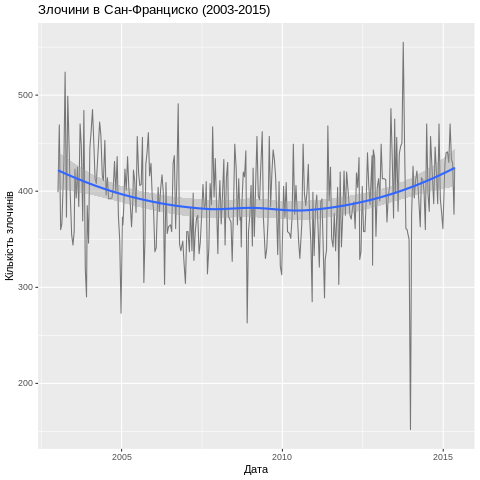

In [17]:
%%R 
library(ggplot2)
ggplot(date_phase, aes(Dates, n)) +
 geom_line(alpha = 0.5) +
 labs(title = "Злочини в Сан-Франциско (2003-2015)",
 x = "Дата",
 y = "Кількість злочинів") +
 geom_point(data = date_phase[date_phase$phase == "Full M
oon", ], color = "red") +
 geom_smooth()

Поки не схоже, що в дні повного Місяця здійснюється більше
злочинів. Однак, це суб'єктивна думка. Давайте знайдемо
середні значення для днів в котрі маємо фазу повного Місяця і
решти фаз:

In [19]:
%%R
x <- mean(date_phase$n[date_phase$phase == "Full Moon"])
mu <- mean(date_phase$n[date_phase$phase != "Full Moon"])
print(x)
print(mu)

[1] 395.7273
[1] 391.7522


Отже, маємо, що середнє значення кількість злочинів у дні
повного Місяця 395.73, в середня кількість у дні інших фаз -
391.75. Будемо вважати середню кількість злочинів у дні інших
фаз оцінкою середнього значення генеральної сукупності.
Визначимо, чи середня кількість злочинів у дні повного Місяця
статистично відрізняється від цього значення.
Сформулюємо гіпотези нашого тесту:



Тобто, ми досліджуємо, чи у дні, коли спостерігається повний
Місяця середня кількість злочинів статистично відрізняється 
від значення 391.75. Вибірка - кількість злочинів у дні повного
Місяця.
Встановимо
Знайдемо розмір та середньоквадратичне відхилення нашої
вибірки:

In [20]:
%%R
n <- length(date_phase$n[date_phase$phase == "Full Moon"])
print(n)
s <- sd(date_phase$n[date_phase$phase == "Full Moon"])
print(s)

[1] 77
[1] 41.63615
ERROR! Session/line number was not unique in database. History logging moved to new session 59


Та знайдемо p-value

In [21]:
%%R 
p_value <- 2*pt(0.839, df=76, lower.tail = FALSE)
p_value

ERROR! Session/line number was not unique in[1] database. History logging moved to new session 60
 0.4041006


Також можемо використати функцію t-test, вказавши вектор
значень та параметри mu = 391.75, alternative =
"two.sided", conf.level = 0.95.

In [23]:
%%R 
x_vector <- date_phase$n[date_phase$phase == "Full Moon"]
t.test(x_vector, mu = 391.75, alternative = "two.sided", conf.level = 0.95)


	One Sample t-test

data:  x_vector
t = 0.83822, df = 76, p-value = 0.4045
alternative hypothesis: true mean is not equal to 391.75
95 percent confidence interval:
 386.2770 405.1775
sample estimates:
mean of x 
 395.7273 



Давайте перевіримо, чи впливає день тижня на кількість
злочинів.
Обрахуємо кількість злочинів для кожного дня тижня та
побудуємо графік:


In [24]:
%%R 
day_of_week_crimes <- full_data %>%
 group_by(DayOfWeek) %>%
 count()
glimpse(day_of_week_crimes)

Observations: 7
Variables: 2
Groups: DayOfWeek [7]
$ DayOfWeek <fct> Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednes…
$ n         <int> 19326, 14840, 18261, 15063, 16843, 18668, 16006


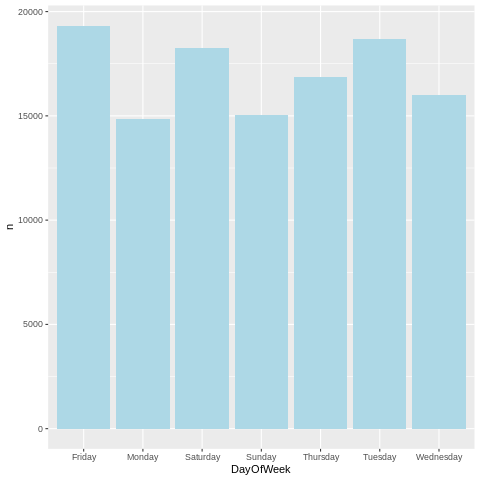

In [25]:
%%R 
ggplot(data=day_of_week_crimes, aes(x=DayOfWeek, y=n)) +
 geom_bar(stat="identity", fill="lightblue")

Змінимо порядок днів, на звичний для нас.


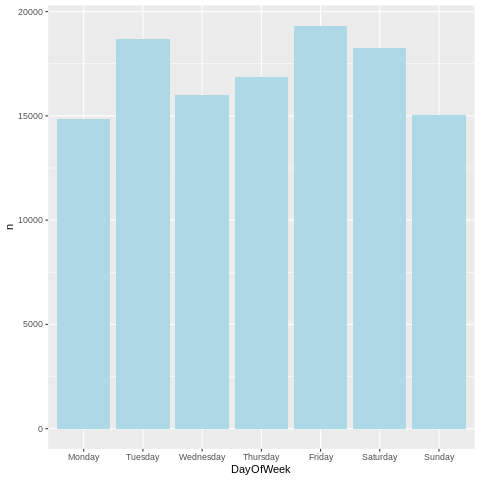

In [27]:
%%R 
day_of_week_crimes$DayOfWeek <- factor(day_of_week_crimes$DayOfWeek , levels = c("Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"))
ggplot(data=day_of_week_crimes, aes(x=DayOfWeek, y=n)) +
    geom_bar(stat="identity", fill="lightblue")


Перевіримо, чи середня кількість злочинів, вчинених по
п'ятницях, відрізняється від середнього значення 391.75.

In [30]:
%%R 
crimes_by_day <- full_data %>%
 group_by(Dates, DayOfWeek) %>%
 count()
 sample_vector <- crimes_by_day$n[crimes_by_day$DayOfWeek ==
"Friday"]

 int [1:46] 399 395 484 485 452 453 396 436 374 402 ...


1. Яка кількість ступенів вільності для вибірки, яка містить лише кількість злочинів, вчинених по п'ятницях?

- [ ] 77
- [ ] 76
- [x] 45
- [ ] 46

In [31]:
%%R
str(sample_vector)

 int [1:46] 399 395 484 485 452 453 396 436 374 402 ...


Обчислимо середнє значення та середньоквадратичне
відхилення для вибірки:

In [32]:
%%R 
x <-mean(crimes_by_day$n[crimes_by_day$DayOfWeek=="Friday"])
print(x)
s <-sd(crimes_by_day$n[crimes_by_day$DayOfWeek == "Friday"])
print(s)

[1] 420.1304
[1] 43.43199


2. Обрахуйте t-статистику для вибірки, яка містить лише кількість злочинів, вчинених по п'ятницях (Ho:μ=391.75, Ha:μ≠391.75):

- [ ] 2.68
- [x] 4.4
- [ ] -3.2
- [ ] 0.67

In [33]:
%%R 
t.test(sample_vector, mu = 391.75, alternative = "two.sided", conf.level = 0.95)


	One Sample t-test

data:  sample_vector
t = 4.4319, df = 45, p-value = 5.932e-05
alternative hypothesis: true mean is not equal to 391.75
95 percent confidence interval:
 407.2327 433.0281
sample estimates:
mean of x 
 420.1304 



3. Обрахуйте p-value, результат заокругліть до четвертого знака після коми (X.XXXX)

- [ ] 0.0015
- [x] 0.0001
- [ ] 0.4764
- [ ] 0.2371

In [41]:
%%R
2*pt(4.4, df=45, lower.tail = FALSE)

[1] 6.573701e-05


4. Чи можемо ми стверджувати, що кількість середня кількість злочинів, вчинених по п'ятницях, статистично відрізняється від значення 391.75?

- [x] так
- [ ] ні

5. Чи містить довірчий інтервал для рівня довіри 99% значення нульової гіпотези Ho=391.75?

- [ ] так
- [x] ні